In [15]:
!pip install scikit-fuzzy

## Importação dos pacotes

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Criando as variáveis (antecendent e consequent)
Antecendent = entrada

Consequent = saida

Universe = universo de discurso


In [17]:
# Antecedents
universe = np.arange(0, 11, 1)

quality = ctrl.Antecedent(universe, "quality")
service = ctrl.Antecedent(universe, "service")

In [18]:
# Consequents
universe = np.arange(0, 26, 1)

tip = ctrl.Consequent(universe, "tip")


## Conjuntos - Funções de Pertinência

In [19]:
quality.automf(number=3)
service.automf(number=3)

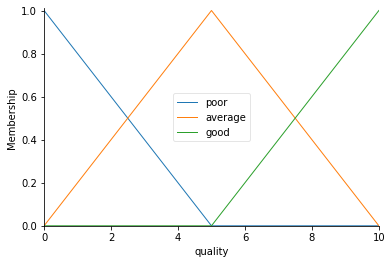

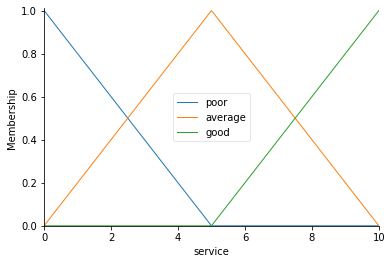

In [20]:
quality.view()
service.view()

In [21]:
tip["low"] = fuzz.trimf(tip.universe, [0,0,13])
tip["medium"] = fuzz.trimf(tip.universe, [0,13,25])
tip["high"] = fuzz.trimf(tip.universe, [13,25,25])

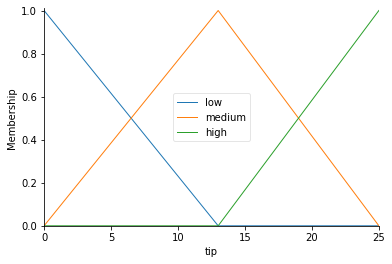

In [22]:
tip.view()

## Base de Regras


In [23]:
rule1 = ctrl.Rule(service["poor"] | quality["poor"], tip["low"])
rule2 = ctrl.Rule(service["average"], tip["medium"])
rule3 = ctrl.Rule(service["good"] | quality["good"], tip["high"])

## Criando o sistema

In [24]:
rules = [rule1, rule2, rule3]
tipping_ctrl = ctrl.ControlSystem(rules)

In [25]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

## Simulações

In [26]:
tipping.input["quality"] = 3.4
tipping.input["service"] = 4

tipping.compute()

In [27]:
res = tipping.output["tip"]

print("Gorjeta:", {res})

Gorjeta: {12.060223409422047}


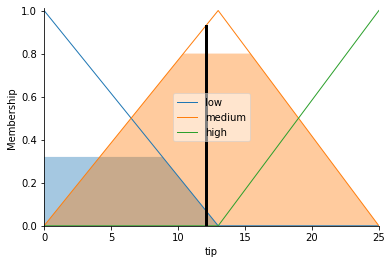

In [28]:
tip.view(sim=tipping)